# The Battle of Neighborhood Part 1
## Singapore's Planning Areas, Subzones, Schools and Population

## Part 1: Data Preparation 1: Planning Areas and Population

In [469]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import requests
import json
from bs4 import BeautifulSoup

from pandas.io.json import json_normalize
print("all libraries have been imported");

all libraries have been imported


 
 ---------------------------------------------------------------
        
        
        
        
        

### 1.1 Dataset: Singapore's planning area

#### a. Data acquirement

In [2]:
# use request.get to send a GET request to the specified url
url = "https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore"

r = requests.get(url)

# get content from website and store in a variable
singapore_html = BeautifulSoup(r.content)

# store all the strings in the html page in variable "soup"
soup = BeautifulSoup(str(singapore_html))

In [4]:
# use find "table", the second table on the website
plarea_tb = soup.find_all('table')[1]

# extract the charaters from the table
table_str = str(plarea_tb.extract())

# read the table into panda dataframe
singapore_df = pd.read_html(table_str)[0]

# display the first five rows of table 
singapore_df.head()

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000


In [5]:
# get the number of rows and columns in the table
singapore_df.shape

(55, 9)

#### b. Data Cleaning and Modification

**1) change names of columns:** 

In [7]:
# check the names of columns
singapore_df.columns

Index(['Name (English)', 'Malay', 'Chinese', 'Pinyin', 'Tamil', 'Region',
       'Area (km2)', 'Population[7]', 'Density (/km2)'],
      dtype='object')

In [8]:
# rename the columns
sg1_df = singapore_df.rename(columns={"Name (English)": "Planning Area"})

sg2_df = sg1_df.rename(columns={"Population[7]": "Population"})

# display the change
sg2_df.head()

,Planning Area,Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population,Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000


**2) remove planning areas without population**

In [18]:
# store these rows in a variable
population_na = sg2_df[sg2_df.Population == '*']

# drop these rows
sg2_df.drop(population_na.index, inplace=True)

# display the first five rows of table 
sg2_df.head()

,Planning Area,Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population,Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000


In [19]:
# check the number of rows
sg2_df.shape

(49, 9)

**2) drop unwanted columns:**

In [20]:
# drop useless columns
sg_df = sg2_df.drop(['Malay', 'Chinese','Pinyin','Tamil','Region','Population','Density (/km2)'], axis=1)

# display the first five rows of table 
sg_df.head()

,Planning Area,Area (km2)
0,Ang Mo Kio,13.94
1,Bedok,21.69
2,Bishan,7.62
3,Boon Lay,8.23
4,Bukit Batok,11.13


In [21]:
# get the number of rows and columns in the table
sg_df.shape

(49, 2)

Now we are done with Dataset 1: Singapore's Planning Area

**4）save the Dataframe**

In [272]:
# save the dataframe as csv files for future use
sg_df.to_csv('DF1_Singapore Planning Area.csv', index=False)

 
 ---------------------------------------------------------------
        
        
        
        
        

### 1.2 Dataset: Singapore's Student Population

#### a. Data acquirement

In [23]:
# The code was removed by Watson Studio for sharing.

In [24]:
# store it in a dataframe
sgedu_df = pd.read_csv(body)

# check the dataframe
sgedu_df.head()

,Planning Area,Total,Pre-Primary,Primary,Secondary,Post-Secondary (Non-Tertiary),Polytechnic,Professional Qualification and Other Diploma,University
0,Total,765.3,57.4,262.3,205.7,58.7,79.8,10.4,90.9
1,Ang Mo Kio,31.8,3.0,11.7,8.2,2.3,3,0.2,3.4
2,Bedok,54.4,3.2,18.4,15.0,4.2,5.5,0.7,7.5
3,Bishan,17.5,1.3,5.8,4.1,1.5,1.4,0.4,3.1
4,Bukit Batok,29.3,1.8,8.4,8.1,2.3,3.6,0.7,4.4


In [26]:
# get the shape of dataframe
sgedu_df.shape

(30, 9)

#### b. Data Cleaning and Modification

**1) remove unwanted columns**

In [27]:
# drop columns
sgedu1_df = sgedu_df.drop(['Total','Pre-Primary','Primary','Polytechnic','Professional Qualification and Other Diploma', 'University'],  axis=1)

# check dataframe
sgedu1_df.head()

,Planning Area,Secondary,Post-Secondary (Non-Tertiary)
0,Total,205.7,58.7
1,Ang Mo Kio,8.2,2.3
2,Bedok,15.0,4.2
3,Bishan,4.1,1.5
4,Bukit Batok,8.1,2.3


In [28]:
# check number of rows and columns
sgedu1_df.shape

(30, 3)

**1) add additional column**

In [28]:
# get column names
sgedu1_df.columns

Index(['Planning Area', 'Secondary', 'Post-Secondary (Non-Tertiary)'], dtype='object')

In [29]:
# addtional column which sums up population from secondary and post-secondary education
sgedu1_df['Secondary Education in thousands'] = sgedu1_df.apply(lambda x: x['Secondary'] + x['Post-Secondary (Non-Tertiary)'], axis=1)

# check the dataframe
sgedu1_df.head()

,Planning Area,Secondary,Post-Secondary (Non-Tertiary),Secondary Education in thousands
0,Total,205.7,58.7,264.4
1,Ang Mo Kio,8.2,2.3,10.5
2,Bedok,15.0,4.2,19.2
3,Bishan,4.1,1.5,5.6
4,Bukit Batok,8.1,2.3,10.4


**3) change column units**

In [30]:
# change the units from thousands to one
sgedu1_df["Secondary Education"] = 1000*sgedu1_df["Secondary Education in thousands"]

#check the dataframe
sgedu1_df.head()

,Planning Area,Secondary,Post-Secondary (Non-Tertiary),Secondary Education in thousands,Secondary Education
0,Total,205.7,58.7,264.4,264400.0
1,Ang Mo Kio,8.2,2.3,10.5,10500.0
2,Bedok,15.0,4.2,19.2,19200.0
3,Bishan,4.1,1.5,5.6,5600.0
4,Bukit Batok,8.1,2.3,10.4,10400.0


**4) Remove unwanted columns again**

In [31]:
# drop unwanted columns
sgedu2_df=sgedu1_df.drop(['Secondary','Post-Secondary (Non-Tertiary)','Secondary Education in thousands'], axis=1)

# check the dataframe
sgedu2_df.head()

,Planning Area,Secondary Education
0,Total,264400.0
1,Ang Mo Kio,10500.0
2,Bedok,19200.0
3,Bishan,5600.0
4,Bukit Batok,10400.0


now we are done processing the second dataset!

**5）save the Dataframe**

In [271]:
# save the dataframe as csv files for future use
sgedu2_df.to_csv('DF2_Singapore Student Population.csv', index=False)

 
 ---------------------------------------------------------------
        
        
        
        
        

### 1.3 Dataset: Singapore's Population change and Subzones

#### a. Data acquirement

In [35]:
# use request.get to send a GET request to the specified url
url = "https://www.citypopulation.de/en/singapore/admin/"

r = requests.get(url)

# get content from website and store in a variable
sgsubdiv_html = BeautifulSoup(r.content)

# store all the strings in the html page in variable "soup"
soup = BeautifulSoup(str(sgsubdiv_html))

In [36]:
# use find "table"
plarea_tb = soup.find('table')

# extract the charaters from the table
table_str = str(plarea_tb.extract())

# read the table into panda dataframe
sgsubdiv_df = pd.read_html(table_str)[0]

# display the first five rows of table 
sgsubdiv_df.head()

,Name,Status,PopulationCensus2000-06-30,PopulationCensus2010-06-30,PopulationEstimate2015-06-30,PopulationEstimate2019-06-30,Unnamed: 6
0,Ang Mo Kio,Planning Area,180112,179297,174770,163950,→
1,Ang Mo Kio Town Centre,Subzone,...,4982,5020,4820,→
2,Cheng San,Subzone,31911,30503,29770,28190,→
3,Chong Boon,Subzone,32859,29903,27900,26820,→
4,Kebun Bahru,Subzone,26765,25854,23910,22970,→


In [37]:
# get the number of rows and columns in the table
sgsubdiv_df.shape

(379, 7)

#### b. Data cleaning and modification

**2) remove unwanted columns**

In [38]:
# get the names of the columns
sgsubdiv_df.columns

Index(['Name', 'Status', 'PopulationCensus2000-06-30',
       'PopulationCensus2010-06-30', 'PopulationEstimate2015-06-30',
       'PopulationEstimate2019-06-30', 'Unnamed: 6'],
      dtype='object')

In [39]:
# drop unwanted columns
sgsubdiv2_df = sgsubdiv_df.drop(['PopulationCensus2000-06-30', 'PopulationCensus2010-06-30', 
       'PopulationEstimate2019-06-30', 'Unnamed: 6'], axis=1)

# display
sgsubdiv2_df.head()

,Name,Status,PopulationEstimate2015-06-30
0,Ang Mo Kio,Planning Area,174770
1,Ang Mo Kio Town Centre,Subzone,5020
2,Cheng San,Subzone,29770
3,Chong Boon,Subzone,27900
4,Kebun Bahru,Subzone,23910


**2) get the rows with planning areas**

In [94]:
# get the rows
Planarea_df = sgsubdiv2_df[sgsubdiv2_df.Status == 'Planning Area']

# display
Planarea_df.head()

,Name,Status,PopulationEstimate2015-06-30
0,Ang Mo Kio,Planning Area,174770
13,Bedok,Planning Area,289750
22,Bishan,Planning Area,90700
26,Boon Lay,Planning Area,30
31,Bukit Batok,Planning Area,139270


In [98]:
# check the number of rows and columns
Planarea_df.shape

(55, 3)

**3) remove unwanted columns and rows and change the name**

In [102]:
# drop column of STATUS
Planarea2_df = Planarea_df.drop(['Status'], axis=1)

# change name
Planarea3_df = Planarea2_df.rename(columns={"PopulationEstimate2015-06-30": "Population", 'Name':'Planning Area'})

# drop rows
# store these rows in a variable
population_na = Planarea3_df[Planarea3_df.Population == '...']

# drop these rows
Planarea3_df.drop(population_na.index, inplace=True)


# display
Planarea3_df.head()
                                           

,Planning Area,Population
0,Ang Mo Kio,174770
13,Bedok,289750
22,Bishan,90700
26,Boon Lay,30
31,Bukit Batok,139270


In [103]:
Planarea3_df.shape

(49, 2)

In [104]:
Planarea3_df.dtypes

Planning Area    object
Population       object
dtype: object

In [105]:
Planarea3_df['Population'] = pd.to_numeric(Planarea3_df["Population"], downcast="float")

Planarea3_df.head()

,Planning Area,Population
0,Ang Mo Kio,174770.0
13,Bedok,289750.0
22,Bishan,90700.0
26,Boon Lay,30.0
31,Bukit Batok,139270.0


**4) save the dataframe**

In [270]:
# save to csv
Planarea3_df.to_csv('DF3_Singapore Planning Area 2015 Population.csv', index=False)

 
 ---------------------------------------------------------------
        
        
        
        
        

### 1.3 Combining Dataset: Singapore's Student Population Density

#### a. Dataframe Access

In [273]:
# get first dataframe
pl_df = pd.read_csv('DF1_Singapore Planning Area.csv')

# display
pl_df.head()

,Planning Area,Area (km2)
0,Ang Mo Kio,13.94
1,Bedok,21.69
2,Bishan,7.62
3,Boon Lay,8.23
4,Bukit Batok,11.13


In [274]:
# get second dataframe
edu_df = pd.read_csv('DF2_Singapore Student Population.csv')

# display
edu_df.head()

,Planning Area,Secondary Education
0,Total,264400.0
1,Ang Mo Kio,10500.0
2,Bedok,19200.0
3,Bishan,5600.0
4,Bukit Batok,10400.0


In [275]:
# get third dataframe
pop_df = pd.read_csv('DF3_Singapore Planning Area 2015 Population.csv')

# display
pop_df.head()

,Planning Area,Population
0,Ang Mo Kio,174770.0
1,Bedok,289750.0
2,Bishan,90700.0
3,Boon Lay,30.0
4,Bukit Batok,139270.0


#### b. Merge and Modification

**1) Merge the three Dataframes**

In [108]:
# merge first two dataframes
sgpad_df = pd.merge(pl_df, edu_df, on='Planning Area')

# merge again
sgpa_df = pd.merge(sgpad_df, pop_df, on='Planning Area')


# check the dataframe
sgpa_df.head()

,Planning Area,Area (km2),Secondary Education,Population
0,Ang Mo Kio,13.94,10500.0,174770.0
1,Bedok,21.69,19200.0,289750.0
2,Bishan,7.62,5600.0,90700.0
3,Bukit Batok,11.13,10400.0,139270.0
4,Bukit Merah,14.34,7600.0,155840.0


In [109]:
# check the number of rows and columns
sgpa_df.shape

(28, 4)

**2) Adding columns**

In [110]:
# check the data types for futre reference
sgpa_df.dtypes

Planning Area           object
Area (km2)             float64
Secondary Education    float64
Population             float64
dtype: object

In [111]:
# add a column that calculates density of student population
sgpa_df['Density of Student Population(/km2)'] = sgpa_df.apply(lambda x: x['Secondary Education'] / x['Area (km2)'], axis=1)

# add a column that calculates density of population
sgpa_df['Density of Population(/km2)'] = sgpa_df.apply(lambda x: x['Population'] / x['Area (km2)'], axis=1)

# check the dataframe
sgpa_df.head()

,Planning Area,Area (km2),Secondary Education,Population,Density of Student Population(/km2),Density of Population(/km2)
0,Ang Mo Kio,13.94,10500.0,174770.0,753.228121,12537.302726
1,Bedok,21.69,19200.0,289750.0,885.200553,13358.690641
2,Bishan,7.62,5600.0,90700.0,734.908136,11902.887139
3,Bukit Batok,11.13,10400.0,139270.0,934.411500,12513.027853
4,Bukit Merah,14.34,7600.0,155840.0,529.986053,10867.503487


**3) Remove all unwanted columns again and again**

In [112]:
# drop the columns
sgpa2_df=sgpa_df.drop(['Area (km2)','Population','Secondary Education'], axis=1)

# check 
sgpa2_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
0,Ang Mo Kio,753.228121,12537.302726
1,Bedok,885.200553,13358.690641
2,Bishan,734.908136,11902.887139
3,Bukit Batok,934.411500,12513.027853
4,Bukit Merah,529.986053,10867.503487


In [113]:
# check
sgpa2_df.shape

(28, 3)

Now we are done with this part

**4) Save dataframe**

In [276]:
# save the dataframe as csv files for future use
sgpa2_df.to_csv('DF4_Singapore Population Densities.csv', index=False)

### This is the end of Part 1: Data Preparation 1 for Planning Areas and Population

------------------------------------------------------------------------
------------------------------------------------------------------------

## Part 2: Data Analysis and Visualisation 1: Planning Areas and Population

### 2.1 Dataframe and Preparation

#### a. get data

In [265]:
# read dataframe
sgtc_df = pd.read_csv('DF4_Singapore Population Densities,csv')

# display
sgtc_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
0,Ang Mo Kio,753.228121,12537.302726
1,Bedok,885.200553,13358.690641
2,Bishan,734.908136,11902.887139
3,Bukit Batok,934.411500,12513.027853
4,Bukit Merah,529.986053,10867.503487


#### b. check and change datatypes

**1) check**

In [117]:
# check datatypes
sgtc_df.dtypes

Planning Area                           object
Density of Student Population(/km2)    float64
Density of Population(/km2)            float64
dtype: object

**1) change**

#### c. import packages

In [118]:
%matplotlib inline

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.2


 
 ---------------------------------------------------------------
        
        
        
        
        

### 2.2 Overview of Population Density and Student Population Density

#### a. population density

**1) prepare the data**

In [119]:
# slice the table 
df_density = sgtc_df.loc[0:27, 'Density of Population(/km2)']

# display the column
df_density.head()

0    12537.302726
1    13358.690641
2    11902.887139
3    12513.027853
4    10867.503487
Name: Density of Population(/km2), dtype: float64

**2) plot data**

<function matplotlib.pyplot.show(*args, **kw)>

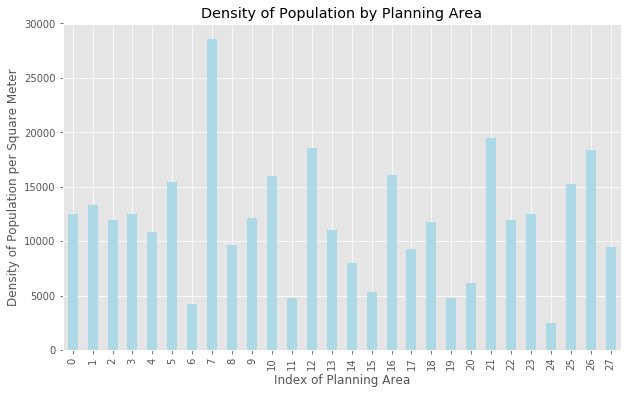

In [120]:
# plot style
df_density.plot(kind='bar', figsize=(10, 6), color='lightblue')

# add to x-label to the plot
plt.xlabel('Index of Planning Area') 
# add to y-label to the plot
plt.ylabel('Density of Population per Square Meter')
# add title to the plot
plt.title('Density of Population by Planning Area')

# display
plt.show

#### b. Student population density

**1) prepare the data**

In [121]:
# slice the table 
df_stdensity = sgtc_df.loc[0:27, 'Density of Student Population(/km2)']

# display the column
df_stdensity.head()

0    753.228121
1    885.200553
2    734.908136
3    934.411500
4    529.986053
Name: Density of Student Population(/km2), dtype: float64

**2) plot data**

<function matplotlib.pyplot.show(*args, **kw)>

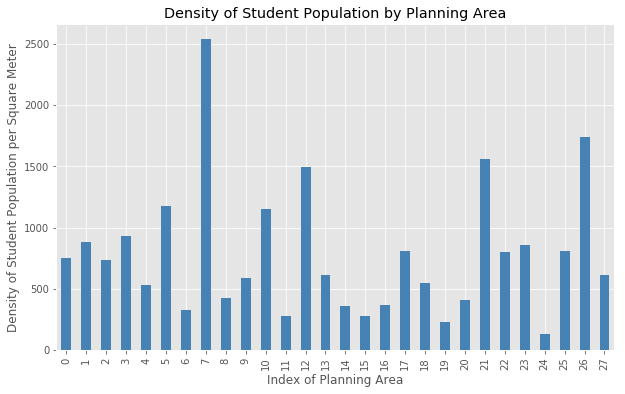

In [122]:
# plot style
df_stdensity.plot(kind='bar', figsize=(10, 6), color='steelblue')

# add to x-label to the plot
plt.xlabel('Index of Planning Area') 
# add to y-label to the plot
plt.ylabel('Density of Student Population per Square Meter')
# add title to the plot
plt.title('Density of Student Population by Planning Area')

# display
plt.show

 
 ---------------------------------------------------------------
        
        
        
        
        

### 2.3 The Top 10  

#### a. Top 10 Planning Areas with the highest population density

**1) sorting data**

In [123]:
# storing sgtc in another dataframe to avoid confusion and interaction
sgtcsorted_df = sgtc_df

# sorting the data
sgtcsorted_df.sort_values(by='Density of Population(/km2)', ascending=True, axis=0, inplace=True)

# display
sgtcsorted_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
24,Tanglin,131.061599,2490.170380
6,Bukit Timah,330.861380,4248.146035
11,Jurong East,274.817723,4766.124509
19,Queenstown,230.053842,4799.314733
15,Novena,278.396437,5344.097996


**2) Get the top 10**

In [124]:
# get the bottom 10 rows
sgtcsorted_top10 = sgtcsorted_df['Density of Population(/km2)'].tail(10)

# display
sgtcsorted_top10

0     12537.302726
1     13358.690641
25    15292.533660
5     15464.961068
10    15959.081120
16    16116.788321
26    18417.218543
12    18560.925800
21    19516.525024
7     28531.914894
Name: Density of Population(/km2), dtype: float64

**3) plot data**

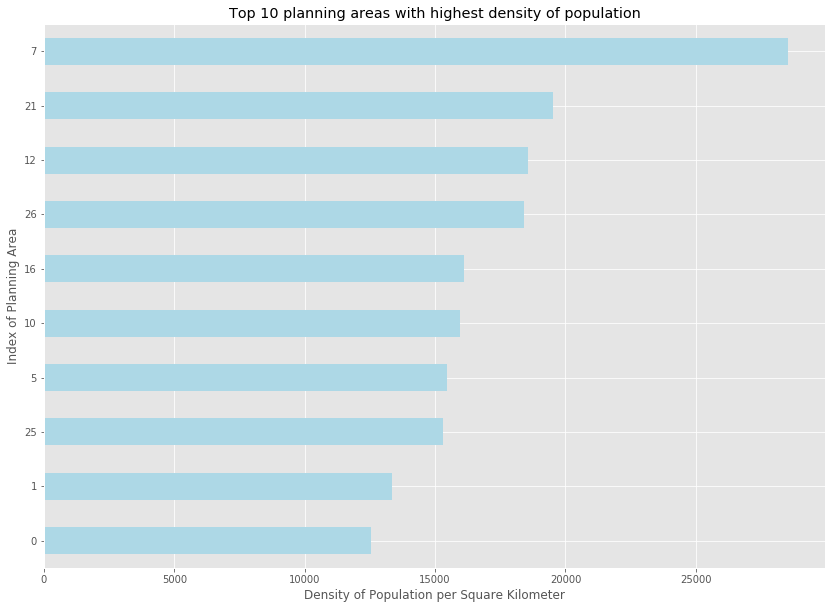

In [125]:
# plot kind and stypl, this time using horizontal bar
sgtcsorted_top10.plot(kind='barh', figsize=(14, 10), color='lightblue')

# add x-label
plt.xlabel('Density of Population per Square Kilometer')
# add y-label
plt.ylabel('Index of Planning Area')
# add title
plt.title('Top 10 planning areas with highest density of population')

# format int with commas (it doesn't work it seems....)
for index, value in enumerate(sgtcsorted_top10): 
    label = format(int(value), ',')
    
# display
plt.show()

#### b. Top 10 Planning Areas with the highest student population density

**1) sorting data**

In [126]:
# storing sgtc in another dataframe to avoid confusion and interaction
sgtcstsorted_df = sgtc_df

# sorting the data
sgtcstsorted_df.sort_values(by='Density of Student Population(/km2)', ascending=True, axis=0, inplace=True)

# display
sgtcstsorted_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
24,Tanglin,131.061599,2490.170380
19,Queenstown,230.053842,4799.314733
11,Jurong East,274.817723,4766.124509
15,Novena,278.396437,5344.097996
6,Bukit Timah,330.861380,4248.146035


**2) Get the top 10**

In [127]:
# get the bottom 10 rows
sgtcstsorted_top10 = sgtcsorted_df['Density of Student Population(/km2)'].tail(10)

# display
sgtcstsorted_top10

17     812.250333
23     861.656295
1      885.200553
3      934.411500
10    1148.600144
5     1179.087875
12    1497.617427
21    1558.073654
26    1736.571008
7     2536.824877
Name: Density of Student Population(/km2), dtype: float64

**3) plot data**

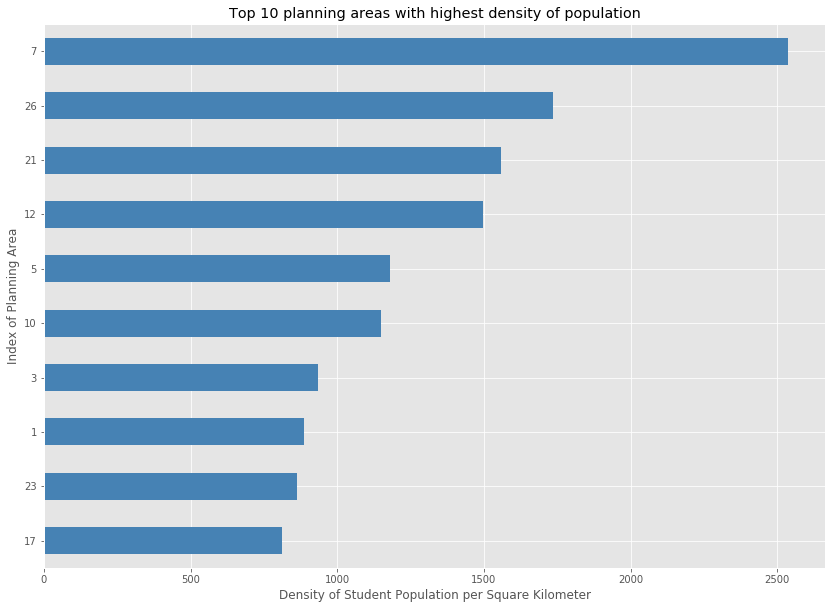

In [128]:
# plot kind and stypl, this time using horizontal bar
sgtcstsorted_top10.plot(kind='barh', figsize=(14, 10), color='steelblue')

# add x-label
plt.xlabel('Density of Student Population per Square Kilometer')
# add y-label
plt.ylabel('Index of Planning Area')
# add title
plt.title('Top 10 planning areas with highest density of population')

# format int with commas (it doesn't work it seems....)
for index, value in enumerate(sgtcstsorted_top10): 
    label = format(int(value), ',')
    
# display
plt.show()

 
 ---------------------------------------------------------------
        
        
        
        
        

### 2.4 Combined Plot with Planning Area

#### a. by Student Population

**1) get data**

In [137]:
# get the top 10 planning areas with the highest density of student population
sgtc3_top10 = sgtcstsorted_df.tail(10)

# display
sgtc3_top10

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
17,Pasir Ris,812.250333,9313.581891
23,Tampines,861.656295,12505.026328
1,Bedok,885.200553,13358.690641
3,Bukit Batok,934.411500,12513.027853
10,Hougang,1148.600144,15959.081120
5,Bukit Panjang,1179.087875,15464.961068
12,Jurong West,1497.617427,18560.925800
21,Sengkang,1558.073654,19516.525024
26,Woodlands,1736.571008,18417.218543
7,Choa Chu Kang,2536.824877,28531.914894


**2) data plot**

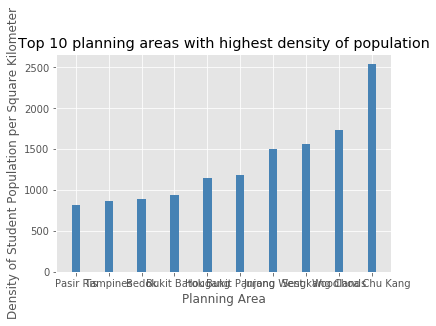

In [133]:
planning_area = [1,2,3,4,5,6,7,8,9,10]
density_of_student_population = sgtc3_top10['Density of Student Population(/km2)']
labels= sgtc3_top10['Planning Area']

plt.bar(planning_area, density_of_student_population, align='center', width=0.25, color='steelblue')
plt.xticks(planning_area, labels)

# add x-label
plt.xlabel('Planning Area')
# add y-label
plt.ylabel('Density of Student Population per Square Kilometer')
# add title
plt.title('Top 10 planning areas with highest density of population')

plt.show()

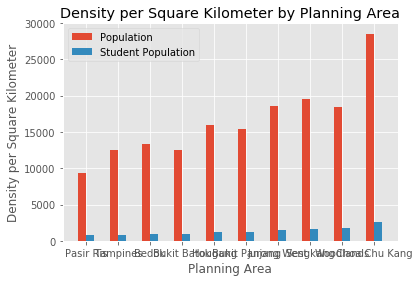

In [134]:
# define variables 
density_of_population = sgtc3_top10['Density of Population(/km2)']
density_of_student_population = sgtc3_top10['Density of Student Population(/km2)']
labels= sgtc3_top10['Planning Area']

#
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, density_of_population, width, label='Population')
rects2 = ax.bar(x + width/2, density_of_student_population, width, label='Student Population')

ax.set_ylabel('Density per Square Kilometer')
ax.set_xlabel('Planning Area')
ax.set_title('Density per Square Kilometer by Planning Area')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



plt.show()

#### b by Population

**1) get data**

In [139]:
# storing sgtc in another dataframe to avoid confusion and interaction
sgtcsorted2_df = sgtc_df

# sorting the data
sgtcsorted2_df.sort_values(by='Density of Population(/km2)', ascending=True, axis=0, inplace=True)

# display
sgtcsorted2_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
24,Tanglin,131.061599,2490.170380
6,Bukit Timah,330.861380,4248.146035
11,Jurong East,274.817723,4766.124509
19,Queenstown,230.053842,4799.314733
15,Novena,278.396437,5344.097996


In [140]:
# get the top 10 planning areas with the highest density of student population
sgtc4_top10 = sgtcsorted2_df.tail(10)

# display
sgtc4_top10

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
0,Ang Mo Kio,753.228121,12537.302726
1,Bedok,885.200553,13358.690641
25,Toa Payoh,807.833537,15292.533660
5,Bukit Panjang,1179.087875,15464.961068
10,Hougang,1148.600144,15959.081120
16,Outram,364.963504,16116.788321
26,Woodlands,1736.571008,18417.218543
12,Jurong West,1497.617427,18560.925800
21,Sengkang,1558.073654,19516.525024
7,Choa Chu Kang,2536.824877,28531.914894


**2) data plot**

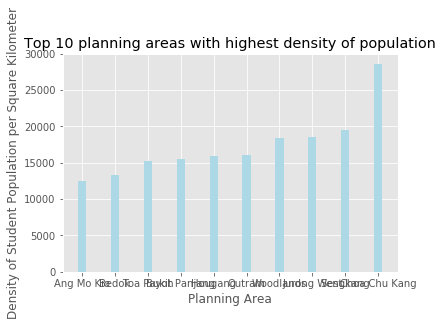

In [142]:
planning_area = [1,2,3,4,5,6,7,8,9,10]
density_of_student_population = sgtc4_top10['Density of Population(/km2)']
labels= sgtc4_top10['Planning Area']

plt.bar(planning_area, density_of_student_population, align='center', width=0.25, color='lightblue')
plt.xticks(planning_area, labels)

# add x-label
plt.xlabel('Planning Area')
# add y-label
plt.ylabel('Density of Student Population per Square Kilometer')
# add title
plt.title('Top 10 planning areas with highest density of population')

plt.show()

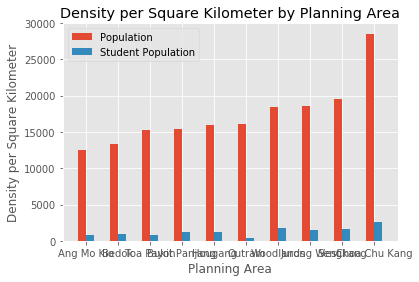

In [143]:
# define variables 
density_of_population = sgtc4_top10['Density of Population(/km2)']
density_of_student_population = sgtc4_top10['Density of Student Population(/km2)']
labels= sgtc4_top10['Planning Area']

#
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, density_of_population, width, label='Population')
rects2 = ax.bar(x + width/2, density_of_student_population, width, label='Student Population')

ax.set_ylabel('Density per Square Kilometer')
ax.set_xlabel('Planning Area')
ax.set_title('Density per Square Kilometer by Planning Area')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



plt.show()

 
 ---------------------------------------------------------------
        
        
        
        
        

### 2.5 Insight from Analysis

From the above bar chart we could see that the planning areas with highest density of student population does not necessarily mean that they also have the highest population density. That means:for planning areas like Bukit Panjang, Jurong West, and Woodlands, the percentage of students in secondary education is higher. Whereas for planning areas like Toa Payoh, and Outram Park, the percentage of students in secondary education is lower.

A conjecture thus arises: does the mismatch the result of number of schools in the specific planning areas? Let's explore!

### This is the end of Part 2: Data Analysis and Visualisation for Planning Areas and Population

------------------------------------------------------------------------
------------------------------------------------------------------------

## Part 3: Data Preparation 2: Schools by Planning Areas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import requests
import json
from bs4 import BeautifulSoup

from pandas.io.json import json_normalize
print("all libraries have been imported");

all libraries have been imported


 
 ---------------------------------------------------------------
        
        
        
        
        

### 3.1 Dataset: Secondary Schools

#### a. Data acquirement

In [193]:
# use request.get to send a GET request to the specified url
url = "https://en.wikipedia.org/wiki/List_of_secondary_schools_in_Singapore"

r = requests.get(url)

# get content from website and store in a variable
singapore_html = BeautifulSoup(r.content)

# store all the strings in the html page in variable "soup"
soup = BeautifulSoup(str(singapore_html))

**1) The first table**

In [157]:
# use find "table", the second table on the website
plarea_tb = soup.find('table')

# extract the charaters from the table
table_str = str(plarea_tb.extract())

# read the table into panda dataframe
secms_df = pd.read_html(table_str)[0]

# display the first five rows of table 
secms_df.head()

,Name,Type,SchoolCode,Area[4],Notes / Affiliations (Admissions / Academic Programmes),Website
0,Admiralty Secondary School,Government,3072,Woodlands,NaN,[1]
1,Ahmad Ibrahim Secondary School,Government,3201,Yishun,NaN,[2]
2,Anderson Secondary School,GovernmentAutonomous,3001,Ang Mo Kio,NaN,[3]
3,Anglican High School,Government-aidedAutonomousSAP,7101,Bedok,NaN,[4]
4,Anglo-Chinese School (Barker Road),Government-aided,7032,Newton,Affiliated to: Methodist Girls' School (Second...,[5]


In [158]:
# get the number of rows and columns in the table
secms_df.shape

(150, 6)

**2) The second table**

In [208]:
# use find "table", the second table on the website
plarea_tb = soup.find_all('table')[1]

# extract the charaters from the table
table_str = str(plarea_tb.extract())

# read the table into panda dataframe
secrs1_df = pd.read_html(table_str)[0]

# display the first five rows of table 
secrs1_df.head()

,Name,Type,Area,Notes,Website
0,Madrasah Aljunied Al-Islamiah,Independent,Rochor,NaN,NaN
1,Madrasah Al-Irsyad Al-Islamiah,Independent,Braddell,NaN,NaN
2,Madrasah Al-Arabiah Al-Islamiah,Independent,Toa Payoh,NaN,NaN
3,Madrasah Al-Maarif Al-Islamiah,Independent,Geylang,NaN,NaN
4,Madrasah Alsagoff Al-Arabiah,Independent,Rochor,NaN,NaN


In [209]:
# get the number of rows and columns in the table
secrs1_df.shape

(6, 5)

**3) The third table**

In [214]:
# use find "table", the second table on the website
plarea_tb = soup.find_all('table')[0]

# extract the charaters from the table
table_str = str(plarea_tb.extract())

# read the table into panda dataframe
secrs2_df = pd.read_html(table_str)[0]

# display the first five rows of table 
secrs2_df.head()

,Name,Type,Area,Affiliated Denomination,Notes,Website
0,San Yu Adventist School,Private,Novena,Seventh-day Adventist Church,NaN,[151]


In [215]:
# get the number of rows and columns in the table
secrs2_df.shape

(1, 6)

**4) The fourth table**

In [198]:
# use find "table", the second table on the website
plarea_tb = soup.find_all('table')[2]

# extract the charaters from the table
table_str = str(plarea_tb.extract())

# read the table into panda dataframe
secrs3_df = pd.read_html(table_str)[0]

# display the first five rows of table 
secrs3_df.head()

,Name,Type,Area,Notes,Website
0,Crest Secondary School,Government,Jurong East,NaN,[152]
1,Spectra Secondary School,Government,Woodlands,NaN,[153]


In [199]:
# get the number of rows and columns in the table
secrs3_df.shape

(2, 5)

#### b. Data Cleaning and Modification

**1) change name**

In [223]:
# change name
secms1_df = secms_df.rename(columns={"Area[4]": "Area"})

# display
secms1_df.head()

,Name,Type,SchoolCode,Area,Notes / Affiliations (Admissions / Academic Programmes),Website
0,Admiralty Secondary School,Government,3072,Woodlands,NaN,[1]
1,Ahmad Ibrahim Secondary School,Government,3201,Yishun,NaN,[2]
2,Anderson Secondary School,GovernmentAutonomous,3001,Ang Mo Kio,NaN,[3]
3,Anglican High School,Government-aidedAutonomousSAP,7101,Bedok,NaN,[4]
4,Anglo-Chinese School (Barker Road),Government-aided,7032,Newton,Affiliated to: Methodist Girls' School (Second...,[5]


**2) Concatenate Tables**

In [224]:
# define frame
frames = [secms1_df, secrs1_df, secrs2_df, secrs3_df]

# concatenate
sec_df = pd.concat(frames)

# check
sec_df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(159, 8)

**4) remove unwanted columns from all dataframes**

In [225]:
# check the column names
sec_df.columns

Index(['Affiliated Denomination', 'Area', 'Name', 'Notes',
       'Notes / Affiliations (Admissions / Academic Programmes)', 'SchoolCode',
       'Type', 'Website'],
      dtype='object')

In [252]:
# drop
sec1_df = sec_df.drop(["Type", "Affiliated Denomination", "Notes", "Notes / Affiliations (Admissions / Academic Programmes)", "SchoolCode", "Website"], axis=1)

# change name
sec2_df = sec1_df.rename(columns={'Area': 'Planning Area'})

# display
sec2_df.head()

,Planning Area,Name
0,Woodlands,Admiralty Secondary School
1,Yishun,Ahmad Ibrahim Secondary School
2,Ang Mo Kio,Anderson Secondary School
3,Bedok,Anglican High School
4,Newton,Anglo-Chinese School (Barker Road)


**5) save dataframe**

In [281]:
sec2_df.to_csv('DF5_Secondary Schools.csv', index=False)

 
 ---------------------------------------------------------------
        
        
        
        
        

### 3.2 Dataset: JCs

#### a. Data acquirement

In [243]:
# use request.get to send a GET request to the specified url
url = "https://en.wikipedia.org/wiki/List_of_schools_in_Singapore"

r = requests.get(url)

# get content from website and store in a variable
singapore_html = BeautifulSoup(r.content)

# store all the strings in the html page in variable "soup"
soup = BeautifulSoup(str(singapore_html))

In [244]:
# use find "table"
plarea_tb = soup.find('table')

# extract the charaters from the table
table_str = str(plarea_tb.extract())

# read the table into panda dataframe
jc1_df = pd.read_html(table_str)[0]

# display the first five rows of table 
jc1_df.head()

Code Planning Area Planning Subzone                       College name  \
   Code Planning Area Planning Subzone                            English   
0   715    Ang Mo Kio     Yio Chu Kang  Anderson Serangoon Junior College   
1   803    Queenstown            Dover       Anglo-Chinese Junior College   
2  7001    Queenstown            Dover    Anglo-Chinese IB Junior College   
3   802        Novena          Malcolm            Catholic Junior College   
4  3101       Kallang      Tanjong Rhu                 Dunman High School   

                                               Established  \
      Chinese    Abb.                          Established   
0  安德逊实龙岗初级学院   ASRJC  1984 (AJC) 1988 (SRJC) 2019 (ASRJC)   
1      英华初级学院    ACJC                                 1977   
2      英华自主中学  ACS(I)                                 1886   
3      公教初级学院     CJC                                 1975   
4      德明政府中学     DHS                       1956 2005 – IP   

                    Address              Type   Special programmes  \
                    Address              Type   Special programmes   
0  4500 Ang Mo Kio Avenue 6        Government                 TLEP   
1       25 Dover Close East  Government-aided  ELEP, HSP, MEP, DEP   
2            121 Dover Road       Independent        MEP, HSP, RSP   
3          129 Whitley Road  Government-aided                 ELEP   
4       10 Tanjong Rhu Road        Autonomous       BSP, CLEP, MEP   

                                             Remarks  
                                             Remarks  
0  Formed from the merger of Anderson JC and Sera...  
1                                                NaN  
2      International Baccalaureate Diploma Programme  
3                                                NaN  
4    Accepting first batch of JAE students from 2019

In [245]:
# check
jc1_df.shape

(18, 11)

#### b. Data Cleaning and Modification

**1) remove unwanted columns**

In [246]:
# column names
jc1_df.columns

MultiIndex(levels=[['Address', 'Code', 'College name', 'Established', 'Planning Area', 'Planning Subzone', 'Remarks', 'Special programmes', 'Type'], ['Abb.', 'Address', 'Chinese', 'Code', 'English', 'Established', 'Planning Area', 'Planning Subzone', 'Remarks', 'Special programmes', 'Type']],
           codes=[[1, 4, 5, 2, 2, 2, 3, 0, 8, 7, 6], [3, 6, 7, 4, 2, 0, 5, 1, 10, 9, 8]])

In [247]:
# drop level
jc1_df.columns = jc1_df.columns.droplevel()

# check
jc1_df.columns

Index(['Code', 'Planning Area', 'Planning Subzone', 'English', 'Chinese',
       'Abb.', 'Established', 'Address', 'Type', 'Special programmes',
       'Remarks'],
      dtype='object')

In [249]:
# remove columns
jc2_df = jc1_df.drop(["Code", "Chinese", "Abb.", "Established", "Address", "Type", "Special programmes", "Remarks" ], axis=1)

# check
jc2_df.head()

,Planning Area,Planning Subzone,English
0,Ang Mo Kio,Yio Chu Kang,Anderson Serangoon Junior College
1,Queenstown,Dover,Anglo-Chinese Junior College
2,Queenstown,Dover,Anglo-Chinese IB Junior College
3,Novena,Malcolm,Catholic Junior College
4,Kallang,Tanjong Rhu,Dunman High School


In [255]:
# check
jc2_df.shape

(18, 3)

**2) change column name**

In [257]:
# rename
jc3_df = jc2_df.rename(columns = {'English' : 'Name'})

# display
jc3_df.head()

,Planning Area,Planning Subzone,Name
0,Ang Mo Kio,Yio Chu Kang,Anderson Serangoon Junior College
1,Queenstown,Dover,Anglo-Chinese Junior College
2,Queenstown,Dover,Anglo-Chinese IB Junior College
3,Novena,Malcolm,Catholic Junior College
4,Kallang,Tanjong Rhu,Dunman High School


#### c. Save Dataframe

In [282]:
# save to csv
jc3_df.to_csv('DF6_Junior Colleges.csv', index=False)

 
 ---------------------------------------------------------------
        
        
        
        
        

### 3.3 Combine Dataframes

#### a. access Dataframes

In [279]:
# get first dataframe
pp_df = pd.read_csv('DF4_Singapore Population Densities.csv')

# display
pp_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
0,Ang Mo Kio,753.228121,12537.302726
1,Bedok,885.200553,13358.690641
2,Bishan,734.908136,11902.887139
3,Bukit Batok,934.411500,12513.027853
4,Bukit Merah,529.986053,10867.503487


In [283]:
# get second dataframe
ss_df = pd.read_csv('DF5_Secondary Schools.csv')

# display
ss_df.head()

,Planning Area,Name
0,Woodlands,Admiralty Secondary School
1,Yishun,Ahmad Ibrahim Secondary School
2,Ang Mo Kio,Anderson Secondary School
3,Bedok,Anglican High School
4,Newton,Anglo-Chinese School (Barker Road)


In [284]:
# get third dataframe
jj_df = pd.read_csv('DF6_Junior Colleges.csv')

# display
jj_df.head()

,Planning Area,Planning Subzone,Name
0,Ang Mo Kio,Yio Chu Kang,Anderson Serangoon Junior College
1,Queenstown,Dover,Anglo-Chinese Junior College
2,Queenstown,Dover,Anglo-Chinese IB Junior College
3,Novena,Malcolm,Catholic Junior College
4,Kallang,Tanjong Rhu,Dunman High School


#### b. Merge and Modification

**1) Concatenate Tables**

In [285]:
# define frame
frames = [ss_df, jj_df]

# concatenate
sschool_df = pd.concat(frames)

# check
sschool_df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(177, 3)

In [299]:
# reset index
sschool_df.reset_index()

# display
sschool_df.head()

,Name,Planning Area,Planning Subzone
0,Admiralty Secondary School,Woodlands,NaN
1,Ahmad Ibrahim Secondary School,Yishun,NaN
2,Anderson Secondary School,Ang Mo Kio,NaN
3,Anglican High School,Bedok,NaN
4,Anglo-Chinese School (Barker Road),Newton,NaN


**2) Remove Column**

In [341]:
# drop
ssch_df = sschool_df.drop(["Planning Subzone"], axis=1)

# display
ssch_df.head()

,Name,Planning Area
0,Admiralty Secondary School,Woodlands
1,Ahmad Ibrahim Secondary School,Yishun
2,Anderson Secondary School,Ang Mo Kio
3,Anglican High School,Bedok
4,Anglo-Chinese School (Barker Road),Newton


**3) change areas to planning areas**

In [342]:
# remove those rows with planning Area in the listed planning areas
ssch1_df = ssch_df[~ssch_df['Planning Area'].isin(sg_df["Planning Area"])]

# display
ssch1_df

,Name,Planning Area
5,Anglo-Chinese School (Independent),Dover
24,Changkat Changi Secondary School,Simei
90,Outram Secondary School,Central
102,Raffles Girls' School (Secondary),Central
107,St. Andrew's Secondary School,Potong Pasir
109,"School of Science and Technology, Singapore",Commonwealth West
110,"School of the Arts, Singapore",Dhoby Ghaut
125,Tanglin Secondary School,West Coast Road
151,Madrasah Al-Irsyad Al-Islamiah,Braddell


In [343]:
# check how many rows
ssch1_df.shape

(9, 2)

In [344]:
# create sets 
old = ["Dover", "Commonwealth West", "Potong Pasir", "Braddell", "Simei", "Dhoby Ghaut", "West Coast Road", "Central" ]
new = ["Queenstown", "Queenstown", "Toa Payoh", "Toa Payoh", "Tampines", "Museum", "Clementi", "Outram"]

# change their values names to listed planning areas
ssch_df["Planning Area"] = ssch_df["Planning Area"].replace(old, new)


# display:
ssch_df["Planning Area"]

0          Woodlands
1             Yishun
2         Ang Mo Kio
3              Bedok
4             Newton
5         Queenstown
6         Ang Mo Kio
7      Bukit Panjang
8          Toa Payoh
9          Toa Payoh
10             Bedok
11             Bedok
12             Bedok
13           Kallang
14       Jurong West
15           Hougang
16           Geylang
17       Bukit Batok
18       Bukit Merah
19     Choa Chu Kang
20       Bukit Batok
21            Bishan
22         Sembawang
23         Toa Payoh
24          Tampines
25     Marine Parade
26         Toa Payoh
27          Sengkang
28        Ang Mo Kio
29       Bukit Merah
30     Choa Chu Kang
31         Woodlands
32     Marine Parade
33            Yishun
34          Clementi
35       Jurong East
36          Sengkang
37       Bukit Merah
38             Bedok
39        Ang Mo Kio
40       Jurong West
41           Kallang
42          Tampines
43          Tampines
44           Punggol
45         Woodlands
46        Queenstown
47     Bukit 

In [345]:
# check
ssch_df.shape

(177, 2)

**3）save dataframe for future use**

In [346]:
ssch_df.to_csv("DF7_Singapore Schools.csv", index=False)

**4) Group Data**

In [339]:
# group schools from same planning area together
sch_df = ssch_df.groupby(['Planning Area'])['Name'].apply(lambda x: ','.join(x)).to_frame()

# reset the index numbers following the grouping
sch_df.reset_index(inplace=True)

# display
sch_df.head()

,Planning Area,Name
0,Ang Mo Kio,"Anderson Secondary School,Ang Mo Kio Secondary..."
1,Bedok,"Anglican High School,Bedok Green Secondary Sch..."
2,Bishan,"Catholic High School,Guangyang Secondary Schoo..."
3,Boon Lay,River Valley High School
4,Bukit Batok,"Bukit Batok Secondary School,Bukit View Second..."


In [340]:
# check the shape
sch_df.shape

(32, 2)

**5) Count number of schools in each planning area**

In [369]:

# a function to count number of schools for a specific planning area by accessing to "sch_df" through index
def getCounts(i):
    
    x = sch_df.loc[i,'Planning Area']
    y = ssch_df["Planning Area"].value_counts()[[str(x)]].sum()
    print(y)

# a for loop to get all the counts
def loop(m):
    for n in range(m):
        getCounts(n)
    
# get number of rows in sch_df (number of unique planning areas)
z = len(sch_df.index)

# start the functons
loop(z)
        

8
12
7
1
5
4
5
7
7
5
4
8
4
12
3
5
1
1
5
2
5
1
3
9
2
2
6
5
9
9
11
9


In [370]:
# create a set for the numbers
schoolCounts = [8, 12, 7, 1, 5, 4, 5, 7, 7, 5, 4, 8, 4, 12,3, 5, 1, 1, 5, 2, 5, 1, 3, 9, 2, 2, 6, 5, 9, 9, 11, 9]

# add column to sch_df
sch_df["Number of Schools"] = schoolCounts

# display
sch_df.head()

,Planning Area,Name,Number of Schools
0,Ang Mo Kio,"Anderson Secondary School,Ang Mo Kio Secondary...",8
1,Bedok,"Anglican High School,Bedok Green Secondary Sch...",12
2,Bishan,"Catholic High School,Guangyang Secondary Schoo...",7
3,Boon Lay,River Valley High School,1
4,Bukit Batok,"Bukit Batok Secondary School,Bukit View Second...",5


In [372]:
# check
sch_df.shape

(32, 3)

#### c. Merge tables with planning areas

**1) data access**

In [376]:
# read dataframe
sgtc_df = pd.read_csv('DF4_Singapore Population Densities,csv')

# display
sgtc_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2)
0,Ang Mo Kio,753.228121,12537.302726
1,Bedok,885.200553,13358.690641
2,Bishan,734.908136,11902.887139
3,Bukit Batok,934.411500,12513.027853
4,Bukit Merah,529.986053,10867.503487


**2) merge**

In [377]:
# merge first two dataframes
sgsc_df = pd.merge(sgtc_df, sch_df, on='Planning Area')

# check the dataframe
sgsc_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2),Name,Number of Schools
0,Ang Mo Kio,753.228121,12537.302726,"Anderson Secondary School,Ang Mo Kio Secondary...",8
1,Bedok,885.200553,13358.690641,"Anglican High School,Bedok Green Secondary Sch...",12
2,Bishan,734.908136,11902.887139,"Catholic High School,Guangyang Secondary Schoo...",7
3,Bukit Batok,934.411500,12513.027853,"Bukit Batok Secondary School,Bukit View Second...",5
4,Bukit Merah,529.986053,10867.503487,"Bukit Merah Secondary School,CHIJ St. Theresa'...",4


In [378]:
# check the number of rows and columns
sgsc_df.shape

(27, 5)

**3) save**

In [381]:
# save dataframe to csv
sgsc_df.to_csv("DF8_Number of Schools.csv", index=False)

### This is the end of Part 3: Data Preparation for Singapore Schools
------------------------------------------------------------------------
------------------------------------------------------------------------

## Part 4: Data Analysis and Visualisation 1: Singapore Schools

### 2.1 Dataframe and Preparation

#### a. get data

In [383]:
# retrieve dataframe
ns_df = pd.read_csv("DF8_Number of Schools.csv")

# check
ns_df.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2),Name,Number of Schools
0,Ang Mo Kio,753.228121,12537.302726,"Anderson Secondary School,Ang Mo Kio Secondary...",8
1,Bedok,885.200553,13358.690641,"Anglican High School,Bedok Green Secondary Sch...",12
2,Bishan,734.908136,11902.887139,"Catholic High School,Guangyang Secondary Schoo...",7
3,Bukit Batok,934.411500,12513.027853,"Bukit Batok Secondary School,Bukit View Second...",5
4,Bukit Merah,529.986053,10867.503487,"Bukit Merah Secondary School,CHIJ St. Theresa'...",4


#### b. sort data

In [457]:
# sorting
nssorted = ns_df.sort_values('Number of Schools')

# display
nssorted.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2),Name,Number of Schools
20,Sembawang,405.186386,6201.782820,"Canberra Secondary School,Sembawang Secondary ...",2
16,Outram,364.963504,16116.788321,"Outram Secondary School,Raffles Girls' School ...",2
13,Kallang,610.687023,11037.077426,"Bendemeer Secondary School,Dunman High School,...",3
18,Punggol,546.038544,11750.535332,"Edgefield Secondary School,Greendale Secondary...",3
4,Bukit Merah,529.986053,10867.503487,"Bukit Merah Secondary School,CHIJ St. Theresa'...",4


In [387]:
# get the top 10 values
ns_top10 = nssorted['Number of Schools'].tail(10)

# display
ns_top10

7      7
0      8
10     8
19     9
23     9
24     9
26     9
25    11
12    12
1     12
Name: Number of Schools, dtype: int64

#### c. Plot Data

**1) horizontal bar chart with index**

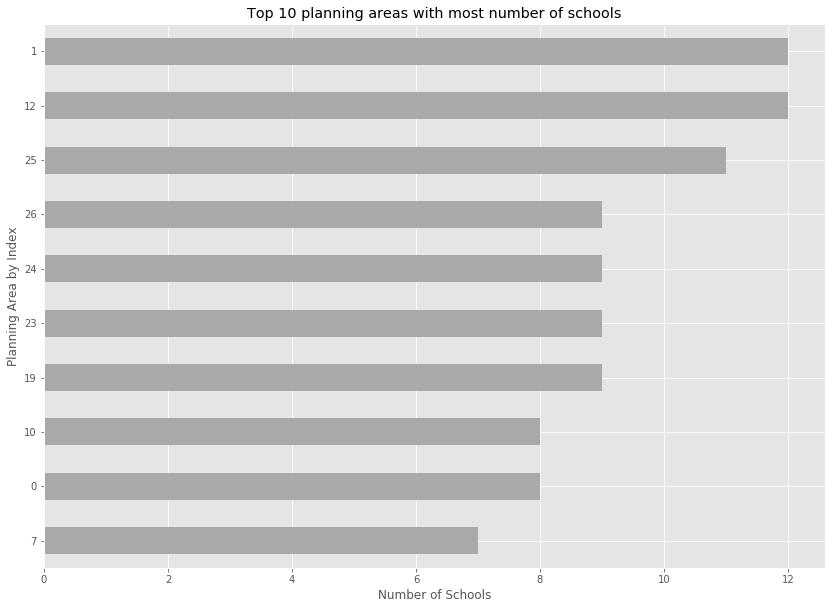

In [395]:
# plot kind and style
ns_top10.plot(kind='barh', figsize=(14, 10), color='darkgrey')

# add x,y labels and title
plt.xlabel('Number of Schools')
plt.ylabel('Planning Area by Index')
plt.title('Top 10 planning areas with most number of schools')


# format int with commas
for index, value in enumerate(ns_top10): 
    label = format(int(value), ',') 
    
# display
plt.show()

**2) bar chart with Planning Area**

In [402]:
# get the top 10 values
ns2_top10 = nssorted.tail(10)

# display
ns2_top10

,Planning Area,Density of Student Population(/km2),Density of Population(/km2),Name,Number of Schools
7,Choa Chu Kang,2536.824877,28531.914894,"Bukit Panjang Government High School,Chua Chu ...",7
0,Ang Mo Kio,753.228121,12537.302726,"Anderson Secondary School,Ang Mo Kio Secondary...",8
10,Hougang,1148.600144,15959.081120,"Bowen Secondary School,Holy Innocents' High Sc...",8
19,Queenstown,230.053842,4799.314733,"Anglo-Chinese School (Independent),Fairfield M...",9
23,Tampines,861.656295,12505.026328,"Changkat Changi Secondary School,Dunman Second...",9
24,Toa Payoh,807.833537,15292.533660,"Bartley Secondary School,Beatty Secondary Scho...",9
26,Yishun,616.760829,9508.945386,"Ahmad Ibrahim Secondary School,Chung Cheng Hig...",9
25,Woodlands,1736.571008,18417.218543,"Admiralty Secondary School,Christ Church Secon...",11
12,Jurong West,1497.617427,18560.925800,"Boon Lay Secondary School,Dunearn Secondary Sc...",12
1,Bedok,885.200553,13358.690641,"Anglican High School,Bedok Green Secondary Sch...",12


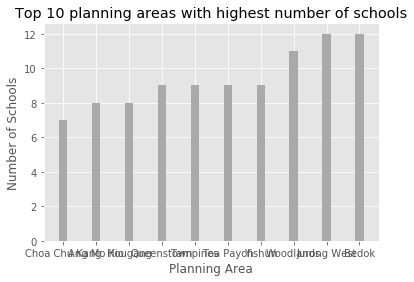

In [403]:
planning_area = [1,2,3,4,5,6,7,8,9,10]
number_of_schools = ns2_top10['Number of Schools']
labels= ns2_top10['Planning Area']

plt.bar(planning_area, number_of_schools, align='center', width=0.25, color='darkgrey')
plt.xticks(planning_area, labels)

# add x-label
plt.xlabel('Planning Area')
# add y-label
plt.ylabel('Number of Schools')
# add title
plt.title('Top 10 planning areas with highest number of schools')

plt.show()

#### c. Combined bar chart with population densities

**1) normalize data**

In [435]:
# import
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = ns_df[['Density of Student Population(/km2)','Number of Schools', 'Density of Population(/km2)']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)


# Run the normalizer on the dataframe
ns_normalized = pd.DataFrame(x_scaled)

# display
ns_normalized.head()

,0,1,2
0,0.075921,0.0,0.080450
1,0.058484,0.0,0.488748
2,0.165007,0.1,0.279567
3,0.136981,0.1,0.308947
4,0.130023,0.2,0.272584


In [436]:
#check
ns_normalized.shape

(27, 3)

In [437]:
# check
ns_normalized.dtypes

0    float64
1    float64
2    float64
dtype: object

In [441]:
# check columns 
ns_normalized.columns

RangeIndex(start=0, stop=3, step=1)

In [450]:
# rename columns
ns_normalized.columns = ['Student Population(Nom)', 'Number of Schools(Nom)', 'Population(Nom)']

# view
ns_normalized.head()

,Student Population(Nom),Number of Schools(Nom),Population(Nom)
0,0.075921,0.0,0.080450
1,0.058484,0.0,0.488748
2,0.165007,0.1,0.279567
3,0.136981,0.1,0.308947
4,0.130023,0.2,0.272584


**2) plot data**

ValueError: shape mismatch: objects cannot be broadcast to a single shape

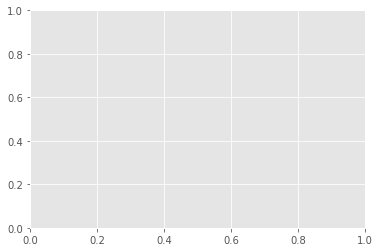

In [468]:
# define variables 
planning_area = [1, 2, ..., 27]
number_of_schools = ns_normalized['Number of Schools(Nom)']
density_of_population = ns_normalized['Population(Nom)']
density_of_student_population = ns_normalized['Student Population(Nom)']
labels = nssorted["Planning Area"]

#
X = np.arange(4)

plt.bar(X + 0.00, number_of_schools, color = 'lightgrey', width = 0.25)
plt.bar(X + 0.25, density_of_student_population, color = 'steelblue', width = 0.25)
plt.bar(X + 0.50, density_of_population, color = 'lightblue', width = 0.25)

plt.ylabel('Density per Square Kilometer')
plt.xlabel('Planning Area')
plt.title('Density per Square Kilometer by Planning Area')
plt.xticks(planning_area, labels)

plt.legend()



plt.show()

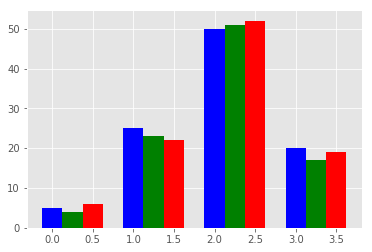

In [472]:
import numpy as np
import matplotlib.pyplot as plt


data = [[5., 25., 50., 20.],
  [4., 23., 51., 17.],
  [6., 22., 52., 19.]]

X = np.arange(4)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

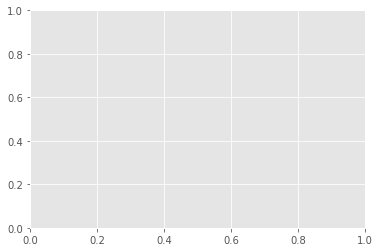

In [473]:
# define variables 
planning_area = [1,2,...,27]
number_of_schools = nssorted["Number of Schools"]
density_of_population = nssorted["Density of Population(/km2)]
density_of_student_population = nssorted['Density of Student Population(/km2)']
labels= nssorted['Planning Area']


#
X = np.arange(4)
plt.bar(X + 0.00, number_of_schools, color = 'lightgrey', width = 0.25)
plt.bar(X + 0.25, density_of_population, color = 'lightblue', width = 0.25)
plt.bar(X + 0.50, density_of_student_population, color = 'steelblue', width = 0.25)

plt.ylabel('Number')
plt.xlabel('Planning Area')
plt.title('Density per Square Kilometer by Planning Area')
plt.xticks(planning_area, labels)





plt.show()

**2) add columns back**

In [431]:
# reset index
nssorted.reset_index(drop=True, inplace=True)

# drop column index if there is
nssorted2 = nssorted.drop(["index"], axis=1)

# view
nssorted2.head()

,Planning Area,Density of Student Population(/km2),Density of Population(/km2),Name,Number of Schools
0,Sembawang,405.186386,6201.782820,"Canberra Secondary School,Sembawang Secondary ...",2
1,Outram,364.963504,16116.788321,"Outram Secondary School,Raffles Girls' School ...",2
2,Kallang,610.687023,11037.077426,"Bendemeer Secondary School,Dunman High School,...",3
3,Punggol,546.038544,11750.535332,"Edgefield Secondary School,Greendale Secondary...",3
4,Bukit Merah,529.986053,10867.503487,"Bukit Merah Secondary School,CHIJ St. Theresa'...",4
